In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [ ]:
mednan = np.load('cirrhosis_medNaN.npy')

In [ ]:
mednan.shape

(412, 33)

In [ ]:
 cleanCirr = np.load('cleanCirrhosis.npy')
 

In [ ]:
cleanCirr.shape

(276, 33)

In [ ]:
onehot = np.load('onehot_cirrhosis_raw.npy')

In [ ]:
badrows = np.isnan(onehot[:,-1]) #rows where the dependent variable is missing
clean_stage = onehot[(badrows*-1 +1).astype(bool)]
clean_stage.shape
nanlocs = np.argwhere(np.isnan(clean_stage))

In [ ]:
np.save('nanlocs.npy',nanlocs)

In [ ]:
allcols =  np.asarray(['ID',  'N_Days',  'Status_CL',  'Status_D',
  'Status_C',  'Drug_nan',  'Drug_Placebo', 'Drug_D-penicillamine',
  'Age',  'Sex_F',  'Sex_M',  'Ascites_nan',
  'Ascites_Y',  'Ascites_N',  'Hepatomegaly_nan',  'Hepatomegaly_Y',
  'Hepatomegaly_N',  'Spiders_nan',  'Spiders_Y',  'Spiders_N',
  'Spiders_nan',  'Spiders_Y',  'Spiders_N',  'Bilirubin',
  'Cholesterol',  'Albumin',  'Copper',  'Alk_Phos',
  'SGOT',  'Tryglicerides',  'Platelets',  'Prothrombin', 'Stage'])

In [ ]:
np.save('col_titles.npy',allcols)

In [ ]:
catStages = np.zeros((mednan.shape[0],4))
cats = set(mednan[:,-1])
for i in range(mednan.shape[0]):
  catStages[i,int(mednan[i,-1])-1] = 1

In [ ]:
catStages[:10,:],mednan[:10,-1]
#all looks good

(array([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]]), array([4., 3., 4., 4., 3., 3., 3., 3., 2., 4.]))

In [ ]:
catCirrMedNan = np.concatenate([mednan[:,:-1],catStages],axis=1)

In [ ]:
np.save('catCirrMedNan.npy',catCirrMedNan)
data = np.load('catCirrMedNan.npy')
#turns out, mednan is better for error analysis

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100), activation='relu',
                    alpha=0.0001, learning_rate_init=0.001, 
                   max_iter=200)
nn=nn.fit(X=data[:,:-4],y=mednan[:,-1])
score =(nn.score(data[:,:-4],mednan[:,-1]))
preds = nn.predict(data[:,:-4])
probs = nn.predict_proba(mednan[:,:-1])

In [ ]:
preds,mednan[:,-1]

(array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 1., 4.,
        4., 3., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 1., 4., 4., 4., 3.,
        4., 1., 4., 3., 3., 4., 4., 4., 4., 3., 3., 3., 3., 3., 4., 4., 4.,
        4., 4., 3., 1., 2., 3., 4., 1., 2., 1., 4., 4., 4., 3., 3., 3., 1.,
        4., 1., 3., 3., 1., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
        4., 4., 3., 4., 3., 4., 4., 3., 4., 4., 3., 4., 3., 3., 4., 3., 4.,
        4., 3., 3., 4., 1., 4., 4., 4., 3., 4., 4., 4., 3., 4., 4., 4., 4.,
        3., 4., 4., 4., 4., 4., 4., 3., 4., 4., 3., 4., 3., 4., 3., 3., 4.,
        4., 4., 4., 4., 3., 4., 4., 4., 4., 3., 4., 3., 4., 3., 4., 4., 1.,
        4., 4., 4., 4., 3., 4., 4., 3., 4., 4., 4., 4., 3., 4., 4., 4., 4.,
        4., 4., 3., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 3., 3., 3., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 3., 4., 4., 4.,
        4., 

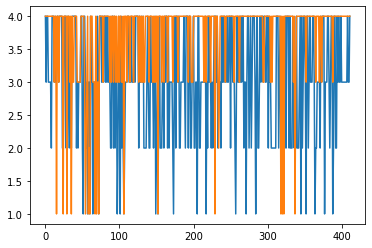

In [ ]:
plt.plot(mednan[:,-1])
plt.plot(preds)
rms = np.sqrt(np.mean((mednan[:,-1]-preds)**2))

In [ ]:
rms,score

(1.174155346067559, 0.42718446601941745)

## Testing the saving and loading feature for pretrained models

In [ ]:
nn.coefs_
nn.intercepts_

[array([ 0.07187723, -0.17225266, -0.06631136, -0.12462226, -0.16742287,
         0.01759517,  0.19708628,  0.17330301,  0.1704394 ,  0.18003206,
         0.17999927, -0.20672695,  0.15688088, -0.00799684,  0.1573524 ,
         0.19410424,  0.13617181, -0.16316098,  0.04229423, -0.14779854,
        -0.03655159, -0.03310868,  0.18361174,  0.1162001 ,  0.12625457,
         0.16297199, -0.21196655, -0.1809227 ,  0.00542133,  0.09733272,
         0.02820881, -0.20761296,  0.12851298,  0.04996   ,  0.05968128,
         0.01169076,  0.02489282, -0.2034211 , -0.06652091, -0.04686312,
        -0.15939032,  0.02630687,  0.02586438,  0.05955503, -0.05185481,
         0.1894291 , -0.03664639, -0.21218163,  0.04599887,  0.03633293,
        -0.16824519, -0.12410089,  0.19580852,  0.04505337,  0.13106023,
         0.12985527,  0.06870077, -0.00181655, -0.07733202,  0.00684196,
         0.03767751, -0.147582  ,  0.02249662, -0.09324265, -0.18323148,
        -0.20771904, -0.12835705, -0.15809833,  0.0

In [ ]:
nn2 = MLPClassifier(hidden_layer_sizes=(100), activation='relu',
                    alpha=0.0001, learning_rate_init=0.001, 
                   max_iter=200)
nn2.coefs_ = nn.coefs_
nn2.intercepts_ = nn.intercepts_